#**Resource-efficient NLP -- Spanish**

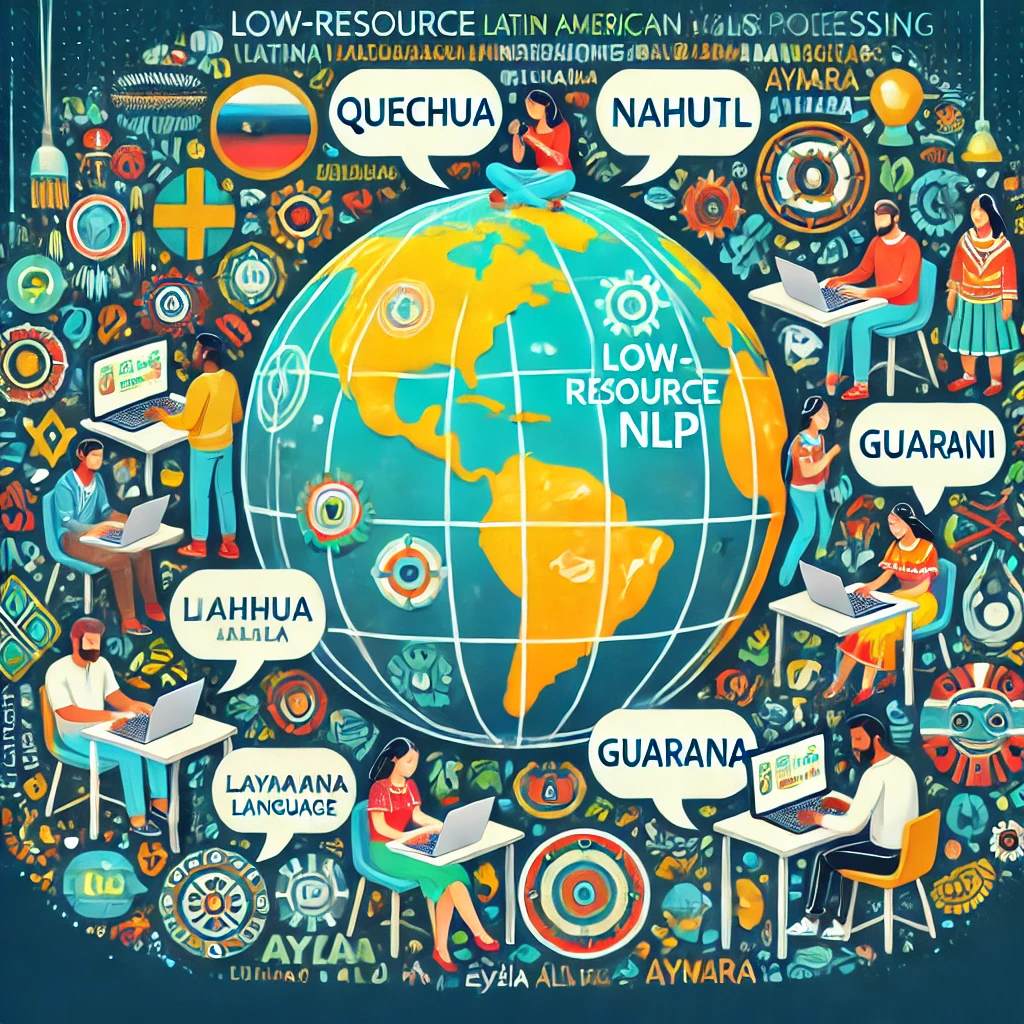

<a href="https://colab.research.google.com/github/khipu-ai/practicals-2025/blob/main/notebooks/Low_Resource_LLM_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© KHIPU 2025. Apache License 2.0.

**Authors:**
Adapted from the [Deep Learning Indaba 2024 notebook](https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Low_Resource_LLMs/Indaba_2024_Low_Resource_LLM.ipynb) by Rodolfo Corona.

**Introduction:**

**Low-resource NLP** (Natural Language Processing) refers to the study and development of models and systems for languages, tasks, or domains that have limited data and resources available. These can include languages with fewer digital text corpora, limited computational tools, or less-developed linguistic research.

In this tutorial, we will explore a number of techniques within NLP which may be applied to low-resource settings. We will simulate a low-resource data setting by operating with a subset of a Spanish summarization dataset, and will employ techniques using a commodity GPU from Google Colab (at the time of writing, this is generally an NVIDIA T4 GPU with 16GB of memory).

**Key Challenges in Low-Resource NLP**

1. **Data Scarcity:**
   - **Limited Training Data:** Many languages lack large annotated corpora necessary for training NLP models.
   - **Lack of Pre-trained Models:** Popular NLP models like BERT, GPT, and others are often not available for low-resource languages.

2. **Linguistic Diversity:**
   - **Morphological Complexity:** Some languages have complex grammatical structures and morphological richness.
   - **Dialectal Variations:** A lack of standardized versions can complicate NLP tasks.

3. **Resource Limitations:**
   - **Computational Constraints:** Low-resource scenarios often involve limited access to computational power and storage.
   - **Expertise and Tools:** Fewer linguistic experts and fewer NLP tools are tailored for these languages.

**Topics:**

Content: Natural Language Processing, Low-resource, Large Language Models, Parameter Efficient Finetuning, Adaptation  
Level: Intermediate


**Aims/Learning Objectives:**

- Exploring data scarcity challenges
- Exploring Compute resource limitations and addressing them with Parameter efficient finetuning
- Comparing Performance between fine-tuned mt5, a Bert-based model, and LLMs on low-resource languages/tasks.
  

**Prerequisites:**

- [LLM Foundations practical](https://colab.research.google.com/github/khipu-ai/practicals-2025/blob/main/notebooks/Foundations_of_LLMs.ipynb)




>[Resource-efficient NLP -- Spanish](#scrollTo=E3WUQi9h6zkb)

>[Setup](#scrollTo=wslj6xaTPR-D)

>>[Run cell to setup the needed packages and resources](#scrollTo=eE6olWFpPR-E)

>>[Imports](#scrollTo=Q7kzqCkyPR-F)

>>[Helper Functions](#scrollTo=qTqatTqwZYRU)

>[Introduction](#scrollTo=85IQK28VPR-F)

>>[What we will do:](#scrollTo=HmX8ef0uPR-F)

>>[Evaluation Metric: ROUGE](#scrollTo=llI-QtN36zko)

>>>[Key ROUGE Variants](#scrollTo=TcWmZmQe6zkp)

>>>[How ROUGE is Computed](#scrollTo=yb7ftV3LQl3G)

>>>[Importance of ROUGE](#scrollTo=Rtf3hD8iYjty)

>>>[Exercise: ROUGE Computation](#scrollTo=mmlgauORYjty)

>>>>[Example 1:](#scrollTo=mdgfRXAvYjty)

>>>>[Example 1 Solution:](#scrollTo=tAaGiOomNa6_)

>>>>[Example 2:](#scrollTo=HdL4NhaOJUtI)

>>>>[Example 2 Solution:](#scrollTo=bVmLlt7cPP23)

>>>[Caveat](#scrollTo=ciFbHAHh6zkp)

>>[Load dataset](#scrollTo=eiqKu07MPR-F)

>>[Check dataset](#scrollTo=4cjG8W9iPR-G)

>[Section 1: Efficiently Fine-Tune Seq2Seq Models with Low Rank Adaptation (LoRA)](#scrollTo=yYkzmZO9PR-G)

>>>[Quick intro to PEFT or Parameter Efficient Fine-tuning:](#scrollTo=9ZMuyy8j6zku)

>>[Low-Rank Adaptation (LoRA)](#scrollTo=AtgK-3iMPR-G)

>>>[How Does LoRA Work?](#scrollTo=AtgK-3iMPR-G)

>>[Summarization Using MT5](#scrollTo=m25VCT7RPR-G)

>>[Evaluation 1: LoRA mT5 Model](#scrollTo=SlBMw-xNyxLb)

>>>[Optional Exercise: How does a larger MT5 model compare?](#scrollTo=Czew5JTPgPUx)

>>[Evaluation 2: Evaluation on Already-Finetuned Bert-Based Models](#scrollTo=Yy6YM9GdPR-K)

>[Section 2: Summarization using LLMs](#scrollTo=lXgW_EWSPR-K)

>>[Sumarization with a Quantized Instruction-tuned LLM](#scrollTo=L2uEAVxUoIZ_)

>>>[Chat Formatting for Instruction-tuned Models.](#scrollTo=L2uEAVxUoIZ_)

>>>[Examples of LLM Generation Using Formatted Chats](#scrollTo=6xpKHSiPSv03)

>>>[Zero-shot Summarization Using Quantized LLM](#scrollTo=mUi4S-8zS8Un)

>>>>[Exercise: Experiment with your own prompt!](#scrollTo=Ed7RS-nBXaMH)

>>>>[Solution Prompt](#scrollTo=fnJepPAxXRTT)

>>>>[Evaluate Your Prompt](#scrollTo=8jlDMm9eZRWk)

>>[Summarization with Google Gemini](#scrollTo=G5dn8h6Nbmzu)

>>>[Create your Google AI Studio API Key](#scrollTo=HQOQ_GZUcIPm)

>>>[N-shot Prompt Function](#scrollTo=fWVYFWWuf8j6)

>>[Evaluate Previously Generated LLM output on the MLSUM test set](#scrollTo=wrOv9fb3PR-L)

>>[ROUGE Metric K-Shot Performance Across Models](#scrollTo=d2Ad0a1jPR-L)

>>>[0-Shot Performance](#scrollTo=8aYrkdyTbmzw)

>>>[1-Shot Performance](#scrollTo=o4zIvm0Rbmzx)

>>>[5-Shot Performance](#scrollTo=N8cSNHnobmzx)

>>>[10-Shot Performance](#scrollTo=mx4AB1Djbmzx)

>[Conclusion](#scrollTo=8s1NaD5bPR-L)

>[Feedback](#scrollTo=e761XjLuPR-L)



**Before you start:**

Please run the next cells in the [Setup](#scrollTo=wslj6xaTPR-D) section to install the required packages and download the needed resources.

For this practical, it is preferable to use a GPU to speed up the flow. In Colab, go to the "Runtime" menu, select "Change runtime type" and then in the popup menu, choose "T4 GPU" in the "Hardware accelerator" box.

# Setup

##  Run cell to setup the needed packages and resources

The resources you'll need to run this practical will be downloaded when you run the next cell.
First, the needed packages are going to be installed then other required resources like dataset, models and pre-generated response files.


After downloading and extraction are complete, you'll have the following folders present in your parent directory:
- *data* folder: this folder has a subset of the mlsum dataset that we will be utilizing in the pratical.
- *results* folder: this folder has pre-generated summaries that will be utilized in Section2.
- *models* folder: this folder contains checkpoints for an already fine-tuned model which we will use.

In [ ]:
# @title Install packages (RUN ME)
!pip install datasets==2.16.1
!pip install evaluate==0.4.3
!pip install huggingface-hub==0.29.1
!pip install numpy==1.26.4
!pip install google-genai==1.3.0
!pip install peft==0.11.1
!pip install pyarrow==11.0.0
!pip install rouge-metric==1.0.1
!pip install rouge_score==0.1.2
!pip install torch
!pip install torchvision
!pip install tqdm==4.66.4
!pip install transformers==4.49.0
!pip install bitsandbytes==0.45.3

## Imports

In [ ]:
import numpy as np
import torch
from IPython.display import display, HTML
from tqdm import tqdm
from datasets import concatenate_datasets, load_from_disk, load_dataset
from evaluate import load
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training, TaskType, PeftConfig, PeftModel
from rouge_metric import PyRouge
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    EncoderDecoderModel,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    BertTokenizerFast,
    BitsAndBytesConfig,
    AutoModelForCausalLM,
    pipeline
)
import os
import time

## Helper Functions

In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """
    Split the dataset into smaller batches for processing.

    Args:
        list_of_elements (list): The list to be split into batches.
        batch_size (int): The size of each batch.

    Yields:
        list: A batch of elements from the input list.
    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]


def calculate_metric_on_test_ds(
    dataset,
    metric,
    model,
    tokenizer,
    batch_size=16,
    device="cuda" if torch.cuda.is_available() else "cpu",
    column_text="article",
    column_summary="highlights",
):
    """
    Calculate evaluation metrics on the test dataset.

    Args:
        dataset (Dataset): The dataset to evaluate on.
        metric (Metric): The metric to use for evaluation.
        model (PreTrainedModel): The model to use for generation.
        tokenizer (PreTrainedTokenizer): The tokenizer for the model.
        batch_size (int): The batch size for processing.
        device (str): The device to use for computation.
        column_text (str): The name of the column containing the input text.
        column_summary (str): The name of the column containing the target summary.

    Returns:
        dict: A dictionary containing the computed metrics.
    """
    model.to(device)
    article_batches = list(
        generate_batch_sized_chunks(dataset[column_text], batch_size)
    )
    target_batches = list(
        generate_batch_sized_chunks(dataset[column_summary], batch_size)
    )

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)
    ):

        inputs = tokenizer(
            article_batch,
            max_length=512,
            truncation=True,
            padding=True,
            return_tensors="pt",
        ).to(device)

        summaries = model.generate(
            input_ids=inputs["input_ids"].to(device),
            attention_mask=inputs["attention_mask"].to(device)
        )
        """ parameter for length penalty ensures that the model does not generate sequences that are too long. """

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [
            tokenizer.decode(
                s, skip_special_tokens=True, clean_up_tokenization_spaces=True
            )
            for s in summaries
        ]

        decoded_summaries = [
            d.replace("", " ").strip().lower() for d in decoded_summaries
        ]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score


def evaluation(tokenizer, model, dataset):
    """
    Evaluate the model on the dataset using ROUGE metrics.

    Args:
        tokenizer (PreTrainedTokenizer): The tokenizer for the model.
        model (PreTrainedModel): The model to evaluate.
        dataset (Dataset): The dataset to evaluate on.

    Returns:
        dict: A dictionary containing the ROUGE scores.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # loading data
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_metric = load("rouge", trust_remote_code=True)
    score = calculate_metric_on_test_ds(
        dataset["test"][0:50],
        rouge_metric,
        model,
        tokenizer,
        batch_size=2,
        column_text="text",
        column_summary="summary",
        device=device,
    )


    return score

# Introduction

In this practical session, we will tackle the challenge of summarization in Spanish in a (artificially) low-data setting. This scarcity presents unique challenges, particularly when working in a computationally constrained environment. Our objective is to design a training process that can be efficiently executed on a commodity GPU.

To achieve this, we will employ a parameter-efficient fine-tuning technique known as Low-Rank Adaptation (LoRA). This approach optimizes the training procedure, making it feasible under limited computational resources.

We will also explore the performance of state-of-the-art LLM models on this task and compare the results with our fine-tuned models.

The focus of this practical session is on generating summaries for news articles in Spanish. The [MLSUM dataset](https://huggingface.co/datasets/reciTAL/mlsum), which we will use, contains articles along with their corresponding summaries.


**Data Fields**
- *text*: a string containing the body of the news article
- *summary*: a string containing the article's summary

Although there are other fields in the dataset, for our purposes we will only use the two fields above.

## What we will do:

First, we will load the dataset.
After the dataset has been loaded, sections 1, 2 may be completed independently of one another.

Before we dive in, however, let's explore the evaluation metric we'll be using in more detail.

## Evaluation Metric: ROUGE

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a set of metrics used to evaluate the quality of summaries by comparing them to reference (or ground truth) summaries. ROUGE is widely used in Natural Language Processing (NLP) tasks, particularly for evaluating the performance of text summarization models.

There are a variety of ROUGE score variants. All are computed as functions of the overlap between a *reference* sentence (e.g. the ground truth summary for an article) and a *hypothesis/candidate*, sentence (e.g. the model's output summary). Units commonly used to compute overlap are **n-grams**, which are subsequences of *n* words, or tokens, in a sentence.

### Key ROUGE Variants

1. **ROUGE-N**: Measures the overlap of n-grams between the candidate summary and the reference summary.
   - **ROUGE-1**: Overlap of unigrams (1-gram).
   - **ROUGE-2**: Overlap of bigrams (2-grams).
   - **ROUGE-L**: Measures the longest common subsequence (LCS) between the candidate and reference summaries.

2. **ROUGE-L**: Measures the longest common subsequence (LCS) between the candidate summary and the reference summary. Unlike ROUGE-N, ROUGE-L considers sentence-level structure similarity by identifying the longest co-occurring sequence of words in both summaries.



3. **ROUGE-W**: A weighted version of ROUGE-L that gives more importance to the contiguous LCS.

4. **ROUGE-S**: Measures the overlap of skip-bigrams, which are pairs of words in their order of appearance that can have any number of gaps between them.

### How ROUGE is Computed

ROUGE metrics can be calculated in terms of three measures:

- **Recall**: The ratio of overlapping units (n-grams, LCS, or skip-bigrams) between the candidate summary and the reference summary to the total units in the reference summary. It answers, "How much of the reference summary is captured by the candidate summary?"

$$R=\frac{\text{\# of matching n-grams}}{\text{\# of n-grams in hypothesis}}\$$

- **Precision**: The ratio of overlapping units between the candidate summary and the reference summary to the total units in the candidate summary. It answers, "How much of the candidate summary is relevant to the reference summary?"

$$P=\frac{\text{\# of matching n-grams}}{\text{\# of n-grams in reference}}$$

- **F1-Score**: The harmonic mean of Precision and Recall. This gives a balanced measure that considers both precision and recall.
$$\text{F1}=\frac{2}{\frac{1}{R}+\frac{1}{P}}$$

The ROUGE score is generally reported as the F1-score as shown above.

**Note**: In order for a match between the reference and hypothesis to be valid, there must be a *one-to-one* mapping between the n-grams.
In other words, if the reference is $\{\text{the, the}\}$ and the hypothesis is $\{\text{the}\}$, then $R=1$ and $P=\frac{1}{2}$

This is why the F1 score is considered more informative than the precision or recall alone. One could trivially maximize recall by predicting a single, commonly occurring word (e.g. "the"), however, this is likely going to lead to a low precision. Conversely, one could trivially maximize precision by predicting a very large list of varied words, however, this would lead to a low recall score. By taking the harmonic mean of the two, the F1 score yields a tighter estimate of lexical similarity between the hypothesis and reference.

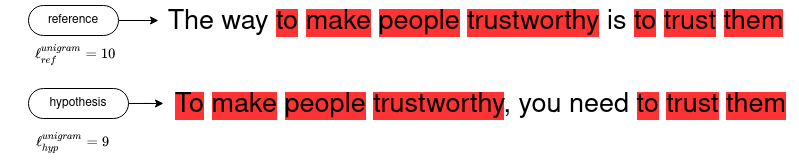

For the reference and hypothesis sentences above, we get the following recall (R), precision (P), and F1-score (F1):
* $R = \frac{7}{10}$
* $P = \frac{7}{9}$
* $F = \frac{2}{\frac{10}{7}+\frac{9}{7}}$



### Importance of ROUGE

ROUGE is essential for summarization tasks because it provides a standardized way to evaluate and compare different summarization models. Higher ROUGE scores generally indicate that the candidate summary is more similar to the reference summary, meaning the model is likely performing well.

### Exercise: ROUGE Computation

To get more familiar with ROUGE computation, fill out the following ROUGE scores and check your answers against the correct answers below.
Notice how different types of hypotheses impact the recall and precision differently.

####**Example 1**:
- *reference*: the dog bit the man
- *hypothesis*: dog

Double click this cell, and for each line, modify your answers by filling in the "\frac{}{}" commands.

ROUGE-1:
- Recall = $\frac{}{}$
- Precision = $\frac{}{}$
- F1 = $\frac{}{\frac{}{}+\frac{}{}}$

#### **Example 1 Solution**:


- *reference*: the dog bit the man
- *hypothesis*: dog

For each line, modify this cell by filling in your answer inside the "\frac{}{}" commands.

ROUGE-1:
- Recall = $\frac{1}{5}$
- Precision = $\frac{1}{1}$
- F1 = $\frac{2}{\frac{5}{1}+\frac{1}{1}}$

####**Example 2**:
- *reference*: the dog bit the man and ran
- *hypothesis*: bit the and dog ran man

Double click this cell, and for each line, modify your answers by filling in the "\frac{}{}" commands.

ROUGE-1:
- Recall = $\frac{}{}$
- Precision = $\frac{}{}$
- F1 = $\frac{}{\frac{}{}+\frac{}{}}$

ROUGE-2:
- Recall = $\frac{}{}$
- Precision = $\frac{}{}$
- F1 = $\frac{}{\frac{}{}+\frac{}{}}$

#### **Example 2 Solution**:


- *reference*: the dog bit a man and ran
- *hypothesis*: bit the and dog ran a man

For each line, modify this cell by filling in your answer inside the "\frac{}{}" commands.

ROUGE-1:
- Recall = $\frac{7}{7}$
- Precision = $\frac{7}{7}$
- F1 = $\frac{2}{\frac{7}{7}+\frac{7}{7}}$

ROUGE-2:
- Recall = $\frac{1}{6}$
- Precision = $\frac{1}{6}$
- F1 = $\frac{2}{\frac{6}{1}+\frac{6}{1}}$

### Caveat

While ROUGE and other evaluation metrics (e.g., BLEU, METEOR, etc) serve as valuable tools for quick and straightforward evaluation of language models, they have certain limitations that render them less than ideal. To begin with, they fall short when it comes to assessing the fluency, coherence, and overall meaning of passages. They are also relatively insensitive to word order. ROUGE primarily measures lexical overlap and may not fully capture the semantic meaning or quality of a summary. For these reasons, researchers are still trying to find improved metrics.

Therefore, these metrics are not shoe-in replacements for human evaluation, but are best used in conjunction with human evaluations for a more comprehensive assessment of summary quality.

Examine some of the examples below, which illustrate these challenges.

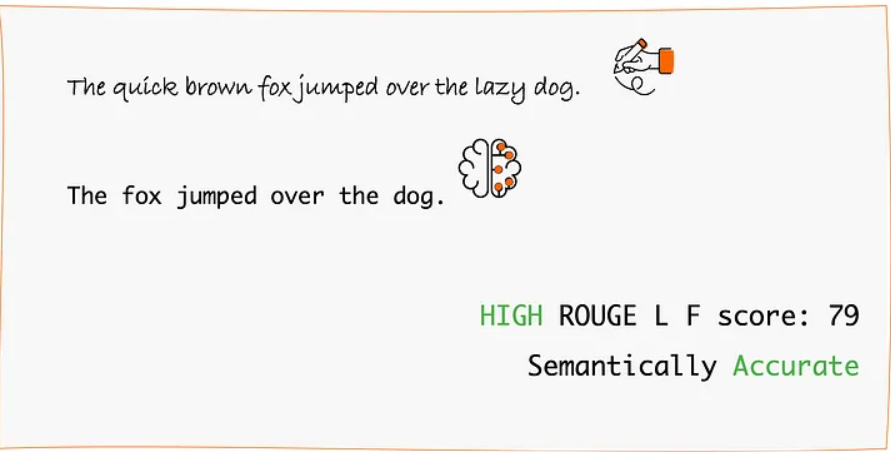

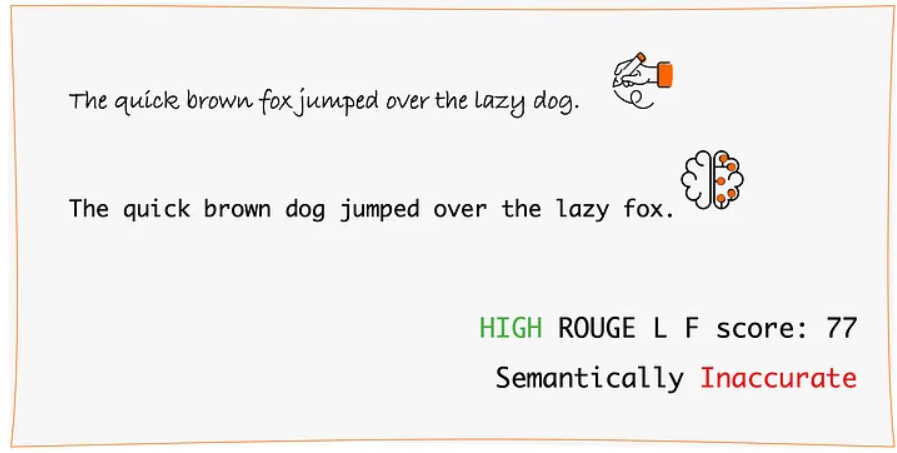

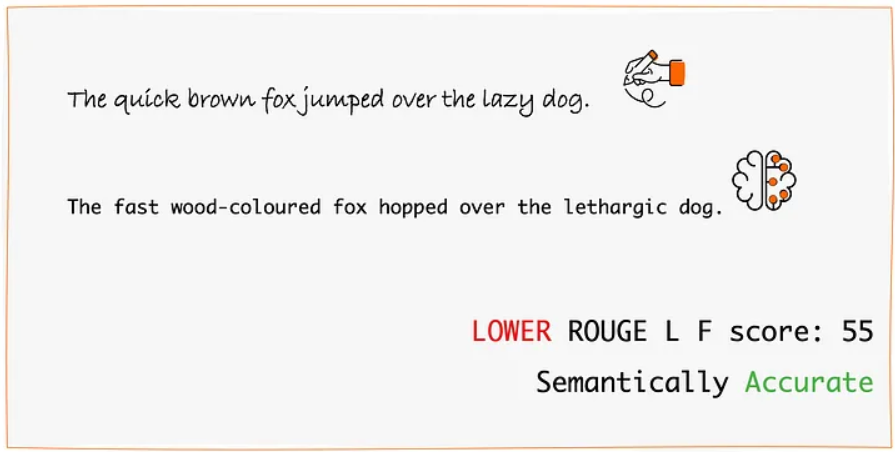

## Load dataset

Now that we've covered the ROUGE evaluation metric, let's dig into the summarization task!
For efficiency purposes, and to simulate a low-resource setting, we will only load a subset of the dataset for this practical. If you have more time and resources, you can load the entire dataset.

In [ ]:
# Comment this out if you would like to load the entire dataset. NOTE: This will take approximately 1.3GB of storage space.
dataset = load_dataset("mlsum", "es")

# Select a subset of the data.
dataset["train"] = dataset["train"].select(range(4000))
dataset["test"] = dataset["test"].select(range(200))
dataset["validation"] = dataset["validation"].select(range(200))

## Check dataset

Let's now inspect the dataset object and the first example from the training set.

In [ ]:
print(dataset)

In [ ]:
dataset['train'][0]

# Section 1: Efficiently Fine-Tune Seq2Seq Models with Low Rank Adaptation (LoRA)

The goal of this section is to fine-tune a base model for our summarization task using a parameter efficient mechanism called low-rank adapatation (LoRA). An implementation of this technique is part of the Parameter Efficient Fine-Tuning (PEFT) library from Hugging Face. We will leverage the 🤗 [Transformers](https://huggingface.co/docs/transformers/index), [Accelerate](https://huggingface.co/docs/accelerate/index), and [PEFT](https://github.com/huggingface/peft) in this section.

You will learn how to:

1. Prepare the dataset
2. Fine-Tune Multilingual T5 with LoRA
3. Run inference & Evaluate

**Note**: For efficiency we will be employing this method on `mt5-small`, a 300M parameter model, i.e. a *small language model*. However, that the methodology used here is general and can be broadly applied to any HuggingFace language model, including open-source large language models (LLMs). We encourage you to adapt the methods from this section to your particular task, models, and needs outside of this tutorial!

### Quick intro to PEFT or Parameter Efficient Fine-tuning:
While large language models (LLMs) have shown remarkable performance across a wide range of NLP tasks, they require significant computation resources to train, fine-tune and deploy. In addition, many real-world use-cases require adapting avialable LLMs to their target task in order to achieve desired performance.

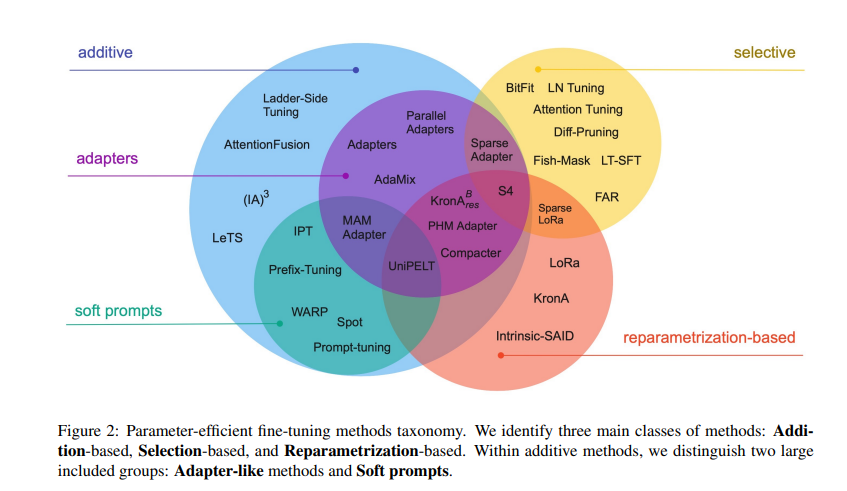

We encourage you to read the following paper if you would like an in depth overview of parameter efficient fine-tuning: <a href="https://arxiv.org/abs/2303.15647#" target="_blank">PEFT Methods, from the paper "Scaling Down to Scale Up: A Guide to Parameter-Efficient Fine-Tuning"
</a>

[PEFT](https://github.com/huggingface/peft), or Parameter Efficient Fine-tuning, is a new open-source library from Hugging Face to enable efficient adaptation of pre-trained models, including but not limited to language models and diffusion mdoels, to various downstream applications without needing fine-tuning all the model's parameters. PEFT includes techniques and variants of many methods such as:

- LoRA: [LoRA: Low-Rank Adaptation of Language models](https://arxiv.org/abs/2106.09685)
- Prefix Tuning: [P-Tuning v2: Prompt Tuning Can Be Comparable to Fine-tuning Universally Across Scales and Tasks](https://arxiv.org/abs/2110.07602)
- P-Tuning: [GPT Understands, Too](https://arxiv.org/abs/2103.10385)
- Prompt Tuning: [The Power of Scale for Parameter-Efficient Prompt Tuning](https://arxiv.org/abs/2104.08691)

## Low-Rank Adaptation (LoRA)

While fine-tuning an entire LLM is cost prohibitive, even on small datasets. For example, fully fine-tuning the Llama7B model requires 112GB of VRAM, i.e. at least two 80GB A100 GPUs. Fortunately, parameter efficient fine-tuning methods such as LoRA allow users with meager resources to adapat an LLM to their target task efficiently and effectively.

In this tutorial we explore QLoRA, which is a parameter-efficient fine-tuning technique that reduces the number of parameters fine-tuned during the adaptation process, and additionally introduces quantization to further lower the memory footprint of the adapted model.

### How Does LoRA Work?

The paper [LoRA: Low-Rank Adaptation of Large Language Models](https://arxiv.org/abs/2106.09685) takes inspiration from the conjecture that over-parameterized models span a low-rank intrinsic dimension. A low intrinsic dimension means the data can be effectively represented or approximated by a lower-dimensional space while retaining most of its essential information or structure. In other words, this means we can decompose the new weight matrix for the adapted task into lower-dimensional (smaller) matrices without losing significant information.

Concretely, let us suppose $\delta W$ is the weight update for an $A\times B$ weight matrix. Then, a low-rank decompsoition of $\delta W$ can be expressed as: $\delta W = W_A W_B$, where $W_A$ is an $A\times k$ matrix and $W_B$ is a $k\times B$ matrix. Here, $k$ is the rank of the decomposition, and is typically much smaller than $A$ and $B$.

![Image courtesty from Sebastian Raschka's Ligthning.AI tutorial on LoRA](https://lightningaidev.wpengine.com/wp-content/uploads/2023/04/lora-4-300x226@2x.png)

## Summarization Using MT5

Prior to fine-tuning our model, we need to select the model we will use as our base model. In this case, we will use the [MT5](https://huggingface.co/google/mt5-small) model, which is a multilingual variant of the T5 model. The MT5 model is trained on a large multilingual corpus and is capable of performing a wide range of NLP tasks, including summarization.

**Optional Additional Exercise**: After finishing the rest of the notebook, we encourage you to come back to this section and run the same experiment with a larger model, e.g. `mt5-base`. It should be possible to run `mt5-base` using the NVIDIA T4 GPU provided by Google Colab. If you have additional computational resources, you may also adapt this code for use with even larger models.

In [ ]:
    # Clear GPU memory.
    model = None
    torch.cuda.empty_cache()

    # base model we will LoRA fine-tune.
    torch.cuda.empty_cache()
    tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")
    model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")

    # Optional Exercise: Run this same experiment on MT5-base, how does it performance compare to MT5-small?
    # NOTE: You may need to reduce the maximum length in order to stay within the GPU memory limits, remember to clear the cuda cache!
    # torch.cuda.empty_cache()
    # tokenizer = AutoTokenizer.from_pretrained("google/mt5-base")
    # model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-base")


Next we prepare our datasets for training. This requires tokenizing the input and output sequences, padding them to the desired length, and then converting them into PyTorch Dataset objects.

In [ ]:
# The maximum total input sequence length after tokenization.
# Sequences longer than this will be truncated, sequences shorter will be padded.

tokenized_inputs = concatenate_datasets([dataset["train"], dataset["test"]]).map(
    lambda x: tokenizer(x["text"], truncation=False),
    batched=True,
    remove_columns=["summary", "topic", "url", "title", "date"],
)
input_lengths = [len(x) for x in tokenized_inputs["input_ids"]]

In [ ]:
# Modity maximum length to be 85th percentile of original max length for better utilization.
max_source_length = int(np.percentile(input_lengths, 85))
print(f"Max source length: {max_source_length}")

In [ ]:
# The maximum total sequence length for target text after tokenization.
# Sequences longer than this will be truncated, sequences shorter will be padded."
tokenized_targets = concatenate_datasets([dataset["train"], dataset["test"]]).map(
    lambda x: tokenizer(x["summary"], truncation=True),
    batched=True,
    remove_columns=["text", "topic", "url", "title", "date"],
)
target_lengths = [len(x) for x in tokenized_targets["input_ids"]]
# take 90 percentile of max length for better utilization
max_target_length = int(np.percentile(target_lengths, 90))
print(f"Max target length: {max_target_length}")

In [ ]:
def preprocess_function(sample, padding="max_length"):
    # # add prefix to the input for t5
    # tokenize inputs
    model_inputs = tokenizer(
        sample["text"],
        max_length=max_source_length,
        padding=padding,
        truncation=True,
    )

    # Tokenize targets with the `summary` keyword argument
    labels = tokenizer(
        sample["summary"],
        max_length=max_target_length,
        padding=padding,
        truncation=True,
    )

    # If we are padding here, replace all tokenizer.pad_token_id in the labels by -100 when we want to ignore
    # padding in the loss.
    if padding == "max_length":
        labels["input_ids"] = [
            [(l if l != tokenizer.pad_token_id else -100) for l in label]
            for label in labels["input_ids"]
        ]

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


tokenized_dataset = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=["summary", "topic", "url", "title", "date"],
)
print(f"Keys of tokenized dataset: {list(tokenized_dataset['train'].features)}")

Finally we need to define our configuration for LoRA. The primary parameters for LoRA are:

* `r`: this is the rank of the decomposed matrices $A$ and $B$ to be learned during fine-tuning. A smaller number will save more GPU memory but might decrease performance.
* `lora_alpha`: this is the weight of the low-rank loss in the total loss function, or the coefficient for the learned $\Delta W$ factor. A larger number will typically result in a larger behavior change after fine-tuning.
* `lora_dropout`: the dropout ratio for layers in the LoRA adapters $A$ and $B$.
* `target_modules`: which modules to learn the low-rank decomposition for. This could be all linear layers, for example, or specific modules in the base network

In [ ]:
lora_config = LoraConfig(
  r=16,
  lora_alpha=32,
  target_modules=["q", "v"],
  lora_dropout=0.05,
  bias="none",
  task_type=TaskType.SEQ_2_SEQ_LM
)
# prepare int-8 model for training
model = prepare_model_for_kbit_training(model)

# add LoRA adaptor
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

In [ ]:
# we want to ignore tokenizer pad token in the loss
label_pad_token_id = tokenizer.pad_token_id
# Data collator
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    label_pad_token_id=label_pad_token_id,
    pad_to_multiple_of=8,
    return_tensors='pt'
)

In [ ]:
NUM_EPOCHS = 1
output_dir = "lora-mlsum-mt5-small"

In [ ]:
# Define training args
training_args = Seq2SeqTrainingArguments(
    output_dir="lora-mt5-mlsum",
    auto_find_batch_size=True,
    learning_rate=1e-3,
    num_train_epochs=NUM_EPOCHS,
    logging_dir=f"{output_dir}/logs",
    logging_strategy="steps",
    logging_steps=25,
    save_strategy="no",
    report_to=["tensorboard",
              #  "wandb",
               ],
)

# Create Trainer instance
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset = tokenized_dataset["train"],
    eval_dataset = tokenized_dataset["validation"].select(range(20)),
    tokenizer = tokenizer,
)

Now we will train our own LoRA adapter! Note, it will take ~10 minutes for the adapter to train fully for one epoch. We encourage you to take this time to read ahead and discuss with your neighbors.

In [ ]:
trainer.train()

## Evaluation 1: LoRA mT5 Model

Let's go ahead and evaluate the adapter that we've trained. First, let's try generating a summary with it below.

In [ ]:
text = dataset["test"][0]["text"]
inputs = tokenizer(text, return_tensors="pt").to('cuda')

with torch.no_grad():
    outputs = model.generate(input_ids=inputs["input_ids"], max_new_tokens=128)
    print(
        tokenizer.batch_decode(
            outputs.detach().cpu().numpy(), skip_special_tokens=True
        )[0]
    )

For comparison, let's also inspect the reference summary and the the input news article text.

In [ ]:
dataset["test"][0]["summary"]

In [ ]:
dataset["test"][0]["text"]

Qualitatively, how do you think your model did? Let's keep this in mind as we move on to a more quantitative evaluation below.

Here are some helper functions for evaluation using ROUGE, please run the cell below.

In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """
    Split the dataset into smaller batches for processing.

    Args:
        list_of_elements (list): The list to be split into batches.
        batch_size (int): The size of each batch.

    Yields:
        list: A batch of elements from the input list.
    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]


def calculate_metric_on_test_ds(
    dataset,
    metric,
    model,
    tokenizer,
    batch_size=16,
    device="cuda" if torch.cuda.is_available() else "cpu",
    column_text="text",
    column_summary="summary",
):
    """
    Calculate evaluation metrics on the test dataset.

    Args:
        dataset (Dataset): The dataset to evaluate on.
        metric (Metric): The metric to use for evaluation.
        model (PreTrainedModel): The model to use for generation.
        tokenizer (PreTrainedTokenizer): The tokenizer for the model.
        batch_size (int): The batch size for processing.
        device (str): The device to use for computation.
        column_text (str): The name of the column containing the input text.
        column_summary (str): The name of the column containing the target summary.

    Returns:
        dict: A dictionary containing the computed metrics.
    """
    model.to(device)
    article_batches = list(
        generate_batch_sized_chunks(dataset[column_text], batch_size)
    )
    target_batches = list(
        generate_batch_sized_chunks(dataset[column_summary], batch_size)
    )

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)
    ):

        inputs = tokenizer(
            article_batch,
            max_length=512,
            truncation=True,
            padding=True,
            return_tensors="pt",
        ).to(device)

        summaries = model.generate(
            input_ids=inputs["input_ids"].to(device),
            attention_mask=inputs["attention_mask"].to(device)
        )
        """ parameter for length penalty ensures that the model does not generate sequences that are too long. """

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [
            tokenizer.decode(
                s, skip_special_tokens=True, clean_up_tokenization_spaces=True
            )
            for s in summaries
        ]

        decoded_summaries = [
            d.replace("", " ").strip().lower() for d in decoded_summaries
        ]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score


def evaluation(tokenizer, model, dataset):
    """
    Evaluate the model on the dataset using ROUGE metrics.

    Args:
        tokenizer (PreTrainedTokenizer): The tokenizer for the model.
        model (PreTrainedModel): The model to evaluate.
        dataset (Dataset): The dataset to evaluate on.

    Returns:
        dict: A dictionary containing the ROUGE scores.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # loading data
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_metric = load("rouge", trust_remote_code=True)
    score = calculate_metric_on_test_ds(
        dataset["test"],
        rouge_metric,
        model,
        tokenizer,
        batch_size=2,
        column_text="text",
        column_summary="summary",
        device=device,
    )


    return score

Now that we've defined our evaluation function, let's evaluate our trained adapter on a subset of the test set.

In [ ]:
evaluation(tokenizer, model, dataset)

### Optional Exercise: How does a larger MT5 model compare?
You might notice that although your model gets some things right, it could be performing better. How much more performance can we get by fine-tuning an even larger model?

Once you finish the rest of the notebook, we encourage you to go back to the [top of this section](https://colab.research.google.com/drive/1lyQnydfHvOyzhe2rHx14dWf8eyZX9q_P?authuser=1#scrollTo=UB7YfDyXPR-G&line=4&uniqifier=1) and re-run the experiment using `mt5-base` instead of `mt5-small`.

Why would we expect `mt5-base` to perform better? Generally speaking, there is a strong positive correlation between language model performance and its parameter count, training dataset size, and amount of compute used to train it.
These are known as *scaling laws* of language models.

If you are interested in learning more about scaling laws, we encourage you to read papers such as the following:
* [Scaling Laws for Neural Language Models](https://arxiv.org/abs/2001.08361)
* [Emergent Abilities of Large Language Models](https://arxiv.org/abs/2206.07682)

**NOTE**: If you attempt this, take care to monitor your GPU memory usage, you may need to reduce `max_source_length` to lower your GPU memory consumption. Also, **it will take close to 1 hour to train this larger model using the dataset subsets we defined above, so please plan accordingly, and use checkpointing if you don't have time to train the model in one run.**

## Evaluation 2: Evaluation on Already-Finetuned Bert-Based Models

Depending on your use case needs, there may be times when using a pre-trained model, either out-of-the-box or as a base to fine-tune on top of, will be strategic.
For datasets that are housed in the HuggingFace hub, such as the MLSUM dataset, you can find a list of models that have been trained/fine-tuned on that dataset and uploaded to HuggingFace for use by the public.

In this section, we will do exactly this and compare the performance of our fine-tuned mt5 model against a BERT-based model that was already fine-tuned on the MLSUM dataset.

In [ ]:
# Clear GPU memory.
model = None
torch.cuda.empty_cache()

# Load model.
model = EncoderDecoderModel.from_pretrained('mrm8488/bert2bert_shared-spanish-finetuned-summarization')
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert2bert_shared-spanish-finetuned-summarization')

In [ ]:
# Evaluate BERT model
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device) # move model to appropriate device

rouge_scores = evaluation(tokenizer, model, dataset)
print(f"ROUGE scores for mrm8488/bert2bert_shared-spanish-finetuned-summarization")
print(rouge_scores)
print("\n")

# Section 2: Summarization using LLMs

So far, the models that have been working with have been (relatively) small, having parameter counts in the *millions* of parameters. You may have also noticed that their performance might not be ideal.

In this section, we will move up to using *large* language models, with parameter counts in the tens or hundreds of *billions* of parameters.

Unlike traditional fine-tuning approaches, which involve updating the model's weights, LLMs may additionally be adapted using prompt engineering. This technique does not require modifying the model’s internal parameters. Instead, prompt engineering involves crafting specific instructions for the model to follow, guiding it to perform a desired task. When examples are provided within the prompt, this method is referred to as few-shot prompting  (Brown et al., 2020).

More broadly, the ability for large languge models to learn from instructions and examples included within their prompts is known as *in-context learning* (ICL).
For learning more about ICL techniques, the following paper can serve as a good starting point: [A Survey on In-context Learning](https://arxiv.org/abs/2301.00234).

The diagram below visually explains zero-shot, one-shot, and few-shot prompting in contrast to traditional fine-tuning.
In *N-shot* prompting, we prepare a single prompt for our model which contains $N$ input/output examples of the task we would like the model to learn, let's call this N-shot prompt the prompt *context*.

Given a new input (which we will call a *query*) we would like to evaluate, i.e. a news article from MLSUM, we concatenate the context and the query and use that as input for the LLM to complete, i.e. $[\text{context};\text{query}]$. Observe how the diagram performs this formatting operation below (note that the diagram refers to the query as the prompt):

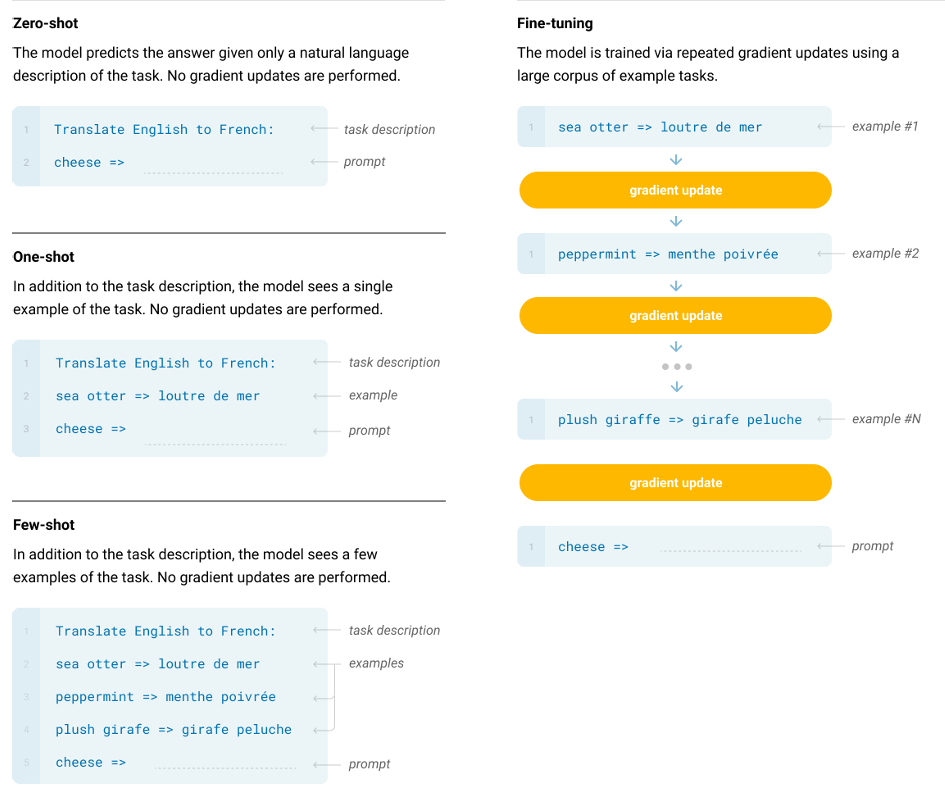

Diagram Source: <a href="https://arxiv.org/pdf/2005.14165" target="_blank">Prompting Vs Traditional fine-tuning diagram from the paper "Language Models are Few-Shot Learners"</a>

## Sumarization with a Quantized Instruction-tuned LLM

The first LLM we will use is `microsoft/Phi-3-medium-128k-instruct`, an open-source, instruction-tuned model with 14 *billion* parameters!
Instruction-tuned LLMs (generarilly signified by an "Instruct" or "It" in their model name) are language models which have been *post-trained* specifically for endowing them with the capability to follow formatted user instructions (e.g. instructions such as "Please tell me a scary story"). This type of post-training is known as *instruction-tuning*.
Instruction-tuning is generally achieved, in part, through the application of techniques such as:

*  Supervised fine-tuning (SFT) -- Using supervised learning with formatted user/assistant dialogues, where the LLM loss is only applied to tokens belonging to the assistant portion of the chat.
*  Reinforcement Learning from Human Feedback (RLHF) -- A family of methods which use reinforcement learning in tandem with data annotated with human preferences with the goal of guiding the model towards generating outputs which are better aligned with general human preferences.

To learn more about post-training more broadly, we recommend the following paper as a starting point: [LLM Post-Training: A Deep Dive into Reasoning Large Language Models](https://arxiv.org/abs/2502.21321)

### Chat Formatting for Instruction-tuned Models.

In order to participate in structured, multi-turn dialogues with users, instruction-tuned models' post-training generally introduces a number of *special tokens*. Special tokens are tokens with a functional role in the generation process, signaling the model switches in the conversational context. Some common special tokens include:
* `<pad>`: The padding token, used to standardize sequence lengths across batches during training, loss on padding tokens is ignored during training.
* `<eos>`: Token used to signify the end of a generation. This can also signify the end of a user's turn or the LLM's (referred to as the *assistant*) turn.
* `<user>`: Token used to signify the beginning of a user query in the dialogue. All tokens pertaining the user turns are ignored during instruction-tuning.
* `<assistant>`: Token used to signify the beginning of an assistant (the LLM) turn. The tokens pertaining to the assistant turn contribute the loss during instruction-tuning.
* `<system>`: Token generally used at the beginning of the input to LLM generation, containing any high-level directives for the LLM to follow during the chat (e.g. "You are a helpful assistant who answers math questions sarcastically.").

For example, chats for `microsoft/Phi-3-medium-128k-instruct` are formatted as `<|user|>\nPrompt <|end|>\n<|assistant|>`, i.e. using a user, end, and assistant special token. Notice how the prompt goes between the user and end tokens. Let's look at how this model applies a chat template below. As input, models expect a list of dialogue turns, each represented as dictionaries. Each dictionary contains two fields:
* *role*: This can be one of `user`, `assistant`, or `system`.
* *content*: A string containing the dialogue component for the turn, i.e. either something the user says or something the LLM responds.

In [ ]:
# Prepare a message to send to the model for our chat.
messages = [
    {'role': 'user', 'content': 'What color is the sky?'},
    {'role': 'assistant', 'content': 'Usually blue.'},
    {'role': 'user', 'content': 'What color are apples?'},
    {'role': 'assistant', 'content': 'Usually red.'}
]

# Apply the chat template.
print(tokenizer.apply_chat_template(messages, tokenize=False))

Now we will load `microsoft/Phi-3-medium-128k-instruct` using model **quantization**. Model quantization is a key part of the resource-efficient NLP toolbox, as it allows for running inference on models using considerably lower amounts of GPU memory than would otherwise be required.

Succinctly, model quantization methods aim to reduce the precision of representations for model weights and activations (e.g. going from 32 bits to 16, 8, or even 4 bit representations!) while approximating the performance of the original model as closely as possible. This reduction in precision, gives way to lower memory requirements and in many cases also computational speedups. A detailed overview of the inner workings is outside of the scope of this tutorial, but we encourage you to read the following resources if you are interested in learning more:
* [A Gentle Introduction to 8-bit Matrix Multiplication for transformers at scale using HuggingFace Transformers, Accelerate, and bitsandbytes](https://huggingface.co/blog/hf-bitsandbytes-integration)
* [A Survey on Model Compression for Large Language Models](https://aclanthology.org/2024.tacl-1.85) (covers model compression more broadly, not just quantization).

**NOTE**: It will take a few minutes to download the weights of the model, it's over 25GB in size!

In [ ]:
# Clear GPU cache.
model = None
torch.cuda.empty_cache()

model_id = "microsoft/Phi-3-medium-128k-instruct"

# Configure 4-bit quantization
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16  # Use bfloat16 if supported, else float16
)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the model with 4-bit quantization
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    device_map="auto",  # Automatically assigns model parts to available devices
    use_flash_attention_2=False
)

### Examples of LLM Generation Using Formatted Chats

Now that we've loaded the model, let's try chatting with it! First, we will define a helper function below for more easily generating a response given a set of messages.
For generation, we will employ the [pipeline](https://huggingface.co/docs/transformers/en/main_classes/pipelines) abstraction from HuggingFace to streamline generation. If you'd like feel free to experiment with different generation hyperparameters!

In [ ]:
# Pipeline object
pipe = pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 256,
    "return_full_text": False,
    "temperature": 1.0, # Higher temperatures make model outputs more random.
    "do_sample": True,
}

def generate_response(messages):
  output = pipe(messages, **generation_args)
  return output[0]['generated_text']

Now, let's try using our pipeline to generate a few responses with the LLM!

In [ ]:
# Format new chat.
messages = [
    {'role': 'user', 'content': 'Write the following sentence using all capital letters: "i love khipu 2025!"'}
]

print(generate_response(messages))

In [ ]:
# Format new chat.
messages = [
    {'role': 'user', 'content': 'Who do you think will win the next FIFA World Cup?'}
]

print(generate_response(messages))

In [ ]:
# Try your own query here!
messages = [
    {'role': 'user', 'content': 'INSERT YOUR QUERY HERE'}
]

print(generate_response(messages))

### Zero-shot Summarization Using Quantized LLM

Now we will use the LLM to generate a summary for a single article below, and inspect both the generated summary and the reference summary from the dataset.
We encourage you to experiment with different prompts to see how the behavior of the LLM changes. Once you find a prompt that you are happy with, go ahead and evaluate its ROUGE score below!

**NOTE: For time purposes, we will evaluate the ROUGE score with a default of only 10 examples.** If you would like to get a more accurate measure of performance and have time to run the longer evaluation, we encourage you to increase the number of examples.

#### Exercise: Experiment with your own prompt!

In [ ]:
# Inspect the article we will summarize.
article_text = dataset['test']['text'][0]
print(article_text)

In [ ]:
# Exercise: Experiment with different prompts below!
def generate_messages(article_text):

  # TODO Generate a formatted message with your prompt using the article text.

  return messages

In [ ]:
# Generate a summary with the LLM and inspect it.
generated_summary = generate_response(model, tokenizer, messages)
print(generated_summary)

In [ ]:
# Inspect the reference summary from the dataset.
print(dataset['test']['summary'][0])

#### Solution Prompt

The solution below is one potential prompt you can use to summarize the article, however, there are many potentially correct ways!

For example, some other things you could try are:
* Asking the LLM to summarize the article in a single sentence (or, more generally, N sentences).
* Asking the LLM to summarize key events in the article, each in one sentence.
* Asking the llm to copy key sentences and patch them together.

In [ ]:
# Exercise: Experiment with different prompts below!
def generate_messages(article_text):

  # Generate a formatted message with your prompt using the article text.
  messages = [{'role': 'user', 'content': f'Summarize the following article in Spanish: "{article_text}"'}]

  return messages

#### Evaluate Your Prompt

We will now evaluate the summarization performance of the LLM using your prompt on 10 examples from the dataset.
**Note**: This will take a few minutes.

In [ ]:
# Import rouge evaluation.
rouge_metric = load('rouge', trust_remote_code=True)

# The generated and reference summaries we will score against each other.
generated_summaries = []
reference_summaries = []

# Number of evaluation examples to use, feel free to change this.
n_eval_examples = 10

for i in tqdm(range(n_eval_examples)):

  # Generate summary with LLM, using your prompt.
  messages = generate_messages(dataset['test']['text'][i])
  gen_summary = generate_response(model, tokenizer, messages)

  # Populate lists.
  generated_summaries.append(gen_summary)
  reference_summaries.append(dataset['test']['summary'][i])

scores = rouge_metric.compute(predictions=generated_summaries, references=reference_summaries)
print(scores)

## Summarization with Google Gemini

We will now use Google Gemini through an API for both zero-shot as well as few-shot summarization, depending on parameters you provide. Using APIs is an additional method in the resource-efficient NLP toolbox since it allows for usage of very large LLMs for relatively minor overhead costs (compared to training and running comparable LLMs using your own compute resources -- it can take millions of dollars to train and thousands to operate these models at scale!).

### Create your Google AI Studio API Key

First, follow the instructions from [Google AI Studio](https://aistudio.google.com/apikey) to generate an API key in order to use Gemini for free.
Currently, Google offers access to Gemini for free, for usage rates (and more documentation on use cases), see the [Gemini Developer API Pricing Guide](https://ai.google.dev/gemini-api/docs/pricing).

### N-shot Prompt Function

The function creates a list of structured messages, including both a *system message* and a *user* query message containing $N$ pairs of article/summary examples. By including multiple examples, the LLM can better generalize to the types of summaries that is expected for the dataset during evaluation.

In [ ]:
import random

def create_prompt_messages(train_source, train_target, max_shots):
    """Create prompt messages for the model, including training examples."""

    messages = []

    for _ in range(max_shots):
        idx = random.choice(range(len(train_source)))
        train_src = train_source[idx]
        train_tgt = train_target[idx]

        example = f"Article:\n\"{train_src}\"\n\nSummary:\n\"{train_tgt}\""

        messages.append(example)

    return '\n\n'.join(messages)

In [ ]:
# Define necessary variables
from google import genai
from google.genai import types

key = "YOUR_API_KEY_HERE"
shots_count = 5 # We'll do 5-shot learning for this example, feel free to experiment with this value, although we recommend keeping it below 10.
client = genai.Client(api_key=key)

Create your few-shot base prompt.

In [ ]:
train_source = dataset["train"]["text"]
train_target = dataset["train"]["summary"]
base_prompt = create_prompt_messages(train_source, train_target, shots_count)

In [ ]:
# Examine the few-shot prompt you created.
print(base_prompt)

Now combine the few-shot prompt with an article from the test set and use Gemini to summarize it.

In [ ]:
# Article we want to summarize.
test_text = dataset["test"]["text"][0]

# Add the article to the prompt.
prompt = base_prompt + '\n\n' + f"Article:\n\"{test_text}\"\n\nSummary:\n"

# Generate the summary using the model.
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=prompt,
    config=types.GenerateContentConfig(
        system_instruction='You are asked to summarize a news article written in Spanish. Write the summary in Spanish only.',
        max_output_tokens=256
    )
)

Let's examine the summary from Gemini.

In [ ]:
print(response.text)

And let's see how we score on ROUGE with this response.

In [ ]:
rouge = load('rouge', trust_remote_code=True)
scores = rouge.compute(predictions=[response.text], references=[dataset["test"]["summary"][0]])
print(scores)

## Evaluate Previously Generated LLM output on the MLSUM test set


Now we will compare the N-shot prompt performance of a variety of LLMs.
In the interest of time, we have provided pre-generated LLM outputs produced by running summarization on the MLSUM datase for a variety of LLMs on 0, 1, 5, and 10 shot prompting cases.

First we define a helper function to evaluate the Rouge score of pre-generated responses.

In [ ]:
import json
import pdb

def evaluate_rouge(hypotheses, references):
    these_refs = [[ref.strip().lower()] for ref in references]
    rouge = load('rouge', trust_remote_code=True)
    scores = rouge.compute(predictions=hypotheses, references=these_refs)

    return scores

def evaluate_response_file(path):

    # Load as JSON object.
    with open(path, 'r') as f:
        responses = json.load(f)

    # Extract the hypotheses and references.
    hypotheses = [r['llm_response'] for r in responses]

    # Extract the references.
    references = [r['summary'] for r in responses]

    zipped = list(zip(hypotheses, references))

    # Remove any elements with None in hypothesis.
    filtered = [z for z in zipped if z[0] is not None]

    # Unzip the filtered list.
    hypotheses, references = zip(*filtered)

    # Evaluate the ROUGE scores.
    return evaluate_rouge(hypotheses, references)

Next, we are going to download the pre-generated LLM responses.

In [ ]:
!wget https://github.com/khipu-ai/practicals-2025/raw/refs/heads/main/resources/resource_efficient_nlp/llm_results_es.zip
!unzip llm_results_es.zip

Now let's evaluate responses from a variety of different models.

In [ ]:
models = ['Llama-3.2-1B-Instruct', 'Llama-3.2-3B-Instruct', 'gemini-2-flash']

# Dictionary to hold all the ROUGE scores.
results = {}

for shot in [0, 1, 5, 10]:

    # Subdictionary to hold the results for the current shot.
    results[shot] = {}

    for model in models:
        results[shot][model] = evaluate_response_file(f"results_es/mlsum_{model}_{shot}_shots.json")

In [ ]:
print(results[0]['gemini-2-flash'].keys())

## ROUGE Metric K-Shot Performance Across Models

Let's define a method for visualizing our results and see how performance varies across models when performing summarization with different example ammounts.

In [ ]:
import pandas as pd
import numpy as np

def display_results(results, shots):
    data = {'Rouge-L': [], 'Rouge-1': [], 'Rouge-2': [], 'Rouge-LSum': []}

    for model in models:
        data['Rouge-L'].append(results[shots][model]['rougeL'])
        data['Rouge-1'].append(results[shots][model]['rouge1'])
        data['Rouge-2'].append(results[shots][model]['rouge2'])
        data['Rouge-LSum'].append(results[shots][model]['rougeLsum'])

    df = pd.DataFrame(data, index=['Llama 3.2 1B Instruct', 'Llama 3.2 3B Instruct', 'Gemini 2 Flash'])
    display(df)

### 0-Shot Performance

In [ ]:
display_results(results, 0)

### 1-Shot Performance

In [ ]:
display_results(results, 1)

### 5-Shot Performance

In [ ]:
display_results(results, 5)

### 10-Shot Performance

In [ ]:
display_results(results, 10)

# Conclusion
**Summary:**

In this practical, we explored the realm of resource-efficient NLP, demonstrating how parameter-efficient fine-tuning techniques and quantization can save resources during both training and inference. We showed how state-of-the-art LLM models can perform the same summarization task through API calls and compared their results with those obtained in a resource-constrained setting.

**Next Steps:**

After going through this practical some immediate next steps could be:

- Explore PEFT techniques other than LORA
- Explore Small language models performance in low-resource setting for training and inference.


For other practicals from KHIPU, please visit [here](https://github.com/khipu-ai/practicals-2025/tree/main).

#Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://docs.google.com/forms/d/e/1FAIpQLSfobbfdH4TgWsnODZQavxq-aGDAGK3T972HWPwUyvka-ax1UQ/viewform?embedded=true",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

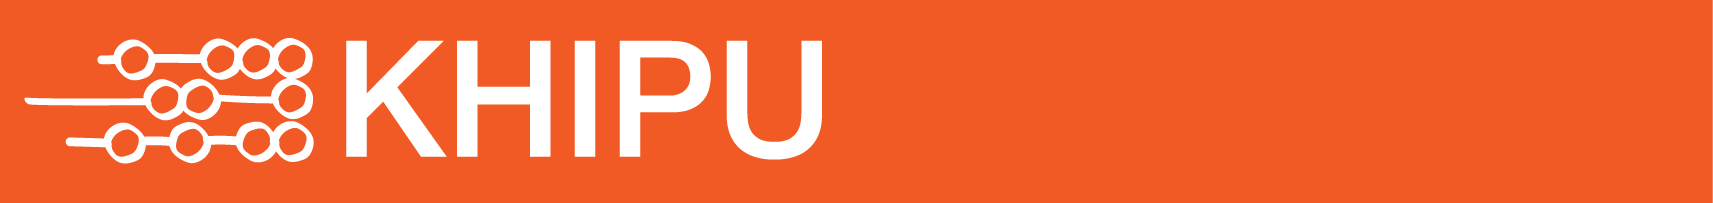